In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpl

In [3]:
def df_for_mplfinance(df):
    daily = df.loc[:, ['date', 'open', 'high', 'low', 'close', 'vol']]
    daily.columns = ('Date', 'Open', 'High', 'Low', 'Close', 'Volume')
    daily.set_index('Date', inplace=True)
    return daily

In [4]:
def plot_candles(df, title=None, ylabel=None):
    data = df_for_mplfinance(df)
    mpf.plot(data,
            type='candle',
            title=title,
            ylabel=ylabel)

def plot_candles2(df, title=None, ylabel=None):
    data = df_for_mplfinance(df)
    mpf.plot(data,
            type='candle',
            title=title,
            style='charles',
            ylabel=ylabel)
    
def plot_candles3(df, title=None, ylabel=None):
    data = df_for_mplfinance(df)
    mpf.plot(data,
            type='candle',
            title=title,
            style='mike',
            ylabel=ylabel)

def candles_volume(df, title=None, ylabel=None):
    data = df_for_mplfinance(df)
    mpf.plot(data,
            type='candle',
            title=title,
            style='charles',
            ylabel=ylabel,
            volume=True,
            ylabel_lower='Volume')

def candles_volume2(df, title=None, ylabel=None):
    data = df_for_mplfinance(df)
    mpf.plot(data,
            type='candle',
            title=title,
            style='charles',
            ylabel=ylabel,
            volume=True,
            ylabel_lower='Volume',
            show_nontrading=True)

def fancy_candles(df, title=None, ylabel=None):
    data = df_for_mplfinance(df)
    mc = mpf.make_marketcolors(
                            up='tab:blue',down='tab:red',
                            edge='lime',
                            wick={'up':'blue','down':'red'},
                            volume='tab:green',
                           )
    s  = mpf.make_mpf_style(marketcolors=mc)
    
    mpf.plot(data,
            type='candle',
            title=title,
            ylabel=ylabel,
            figratio=(12,8),  # figure size
            volume=True,
            ylabel_lower='Volume',
            style=s)

<IPython.core.display.Javascript object>


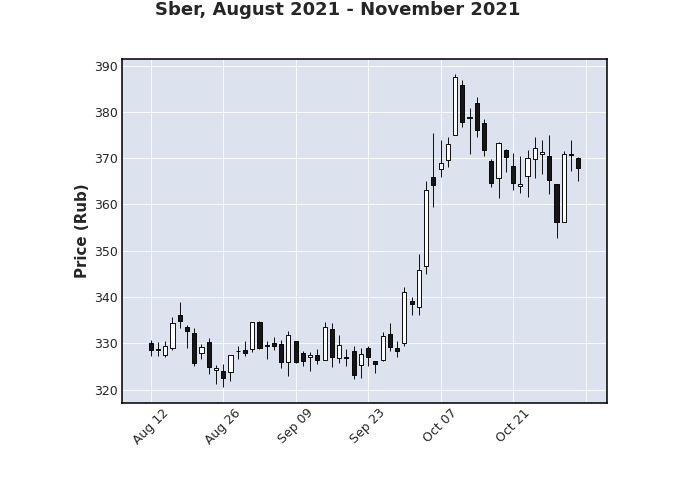

In [5]:
def main(file_path):
    """
    :param file_path: Path to cvs file with trade data
    Must be 9 columns:
    'ticker', 'period', 'date', 'time', 'open', 'high', 'low', 'close', 'volume'
    """
    colnames = ['ticker', 'period', 'date', 'time', 'open', 'high', 'low', 'close', 'vol']
    df = pd.read_csv(file_path, names=colnames)
    df['date'] = df['date'].apply(str)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df['date'] = df['date'] + dt.timedelta(days=1)  # to correct data in the source (1 day behind)
    return df

df = main(r'SBER.csv')
plot_candles(df.iloc[-60:], title='Sber, August 2021 - November 2021', ylabel='Price (Rub)')

<IPython.core.display.Javascript object>


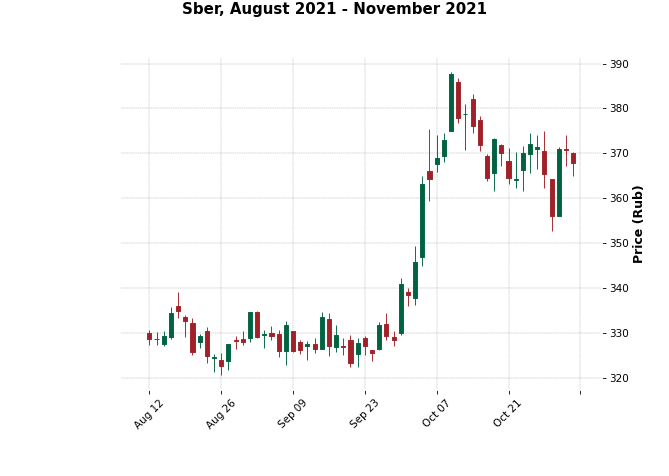

In [6]:
plot_candles2(df.iloc[-60:], title='Sber, August 2021 - November 2021', ylabel='Price (Rub)')

<IPython.core.display.Javascript object>


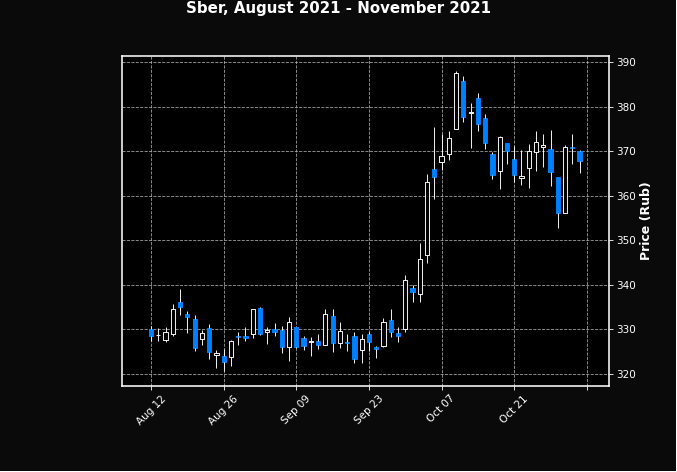

In [7]:
plot_candles3(df.iloc[-60:], title='Sber, August 2021 - November 2021', ylabel='Price (Rub)')

<IPython.core.display.Javascript object>


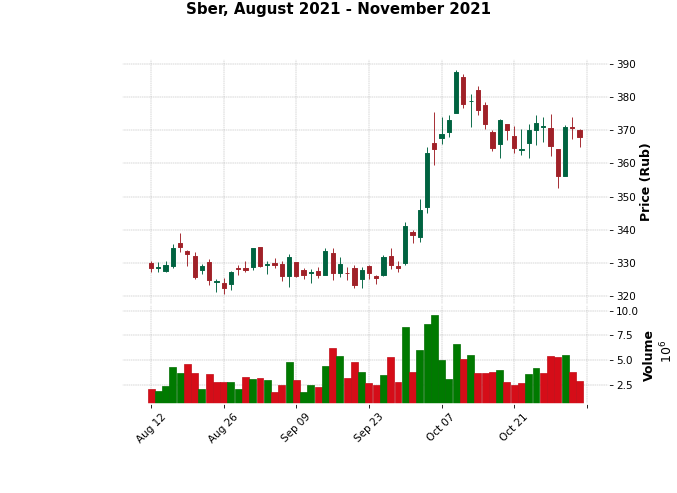

In [8]:
candles_volume(df.iloc[-60:], title='Sber, August 2021 - November 2021', ylabel='Price (Rub)')

<IPython.core.display.Javascript object>


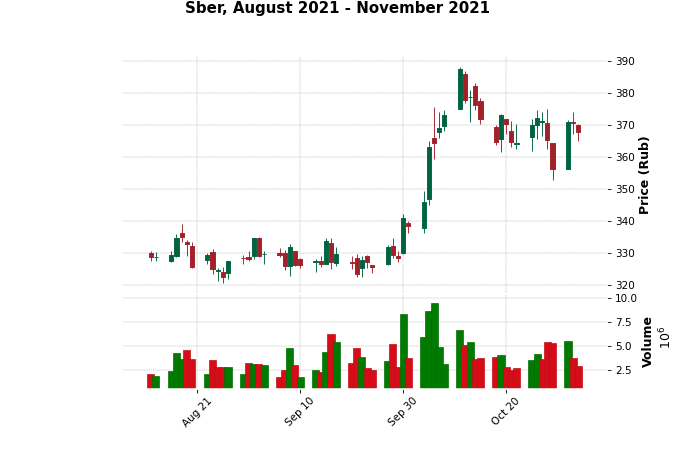

In [9]:
candles_volume2(df.iloc[-60:], title='Sber, August 2021 - November 2021', ylabel='Price (Rub)')

<IPython.core.display.Javascript object>


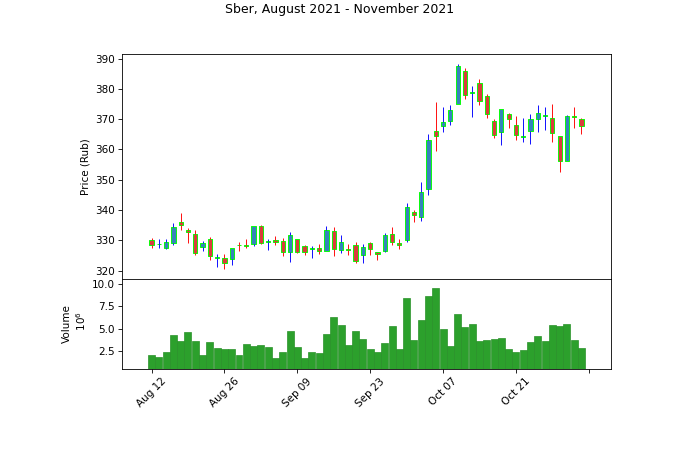

In [10]:
fancy_candles(df.iloc[-60:], title='Sber, August 2021 - November 2021', ylabel='Price (Rub)')